## LogisticRegression

In [2]:
# Import modules
# Python 2, 3 version 호환
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [3]:
# Import data
import pandas as pd
data = pd.read_csv("./BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


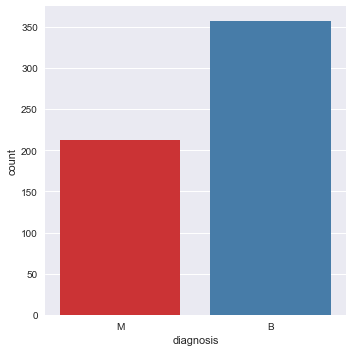

In [6]:
# Check class label distribution
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.countplot(data['diagnosis'], palette='Set1')
plt.tight_layout()
plt.show(fig)

In [8]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
# Split data into X and y; the 'diagnosis' column is the class label
# Only the first 10 columns will be used
X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

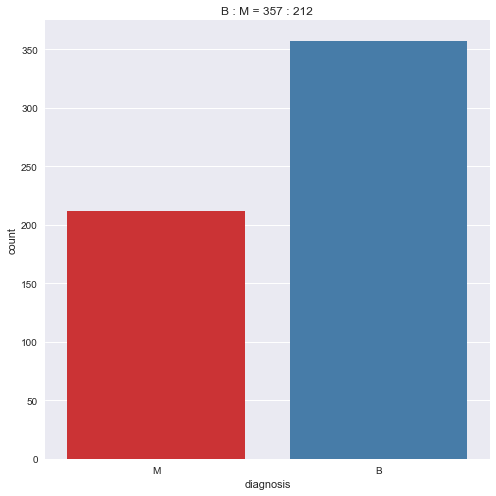

In [10]:
# Check class label distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
ax = sns.countplot(y, palette='Set1')
ax.set_title("B : M = {} : {}".format(*y.value_counts()))
plt.tight_layout()
plt.show(fig)

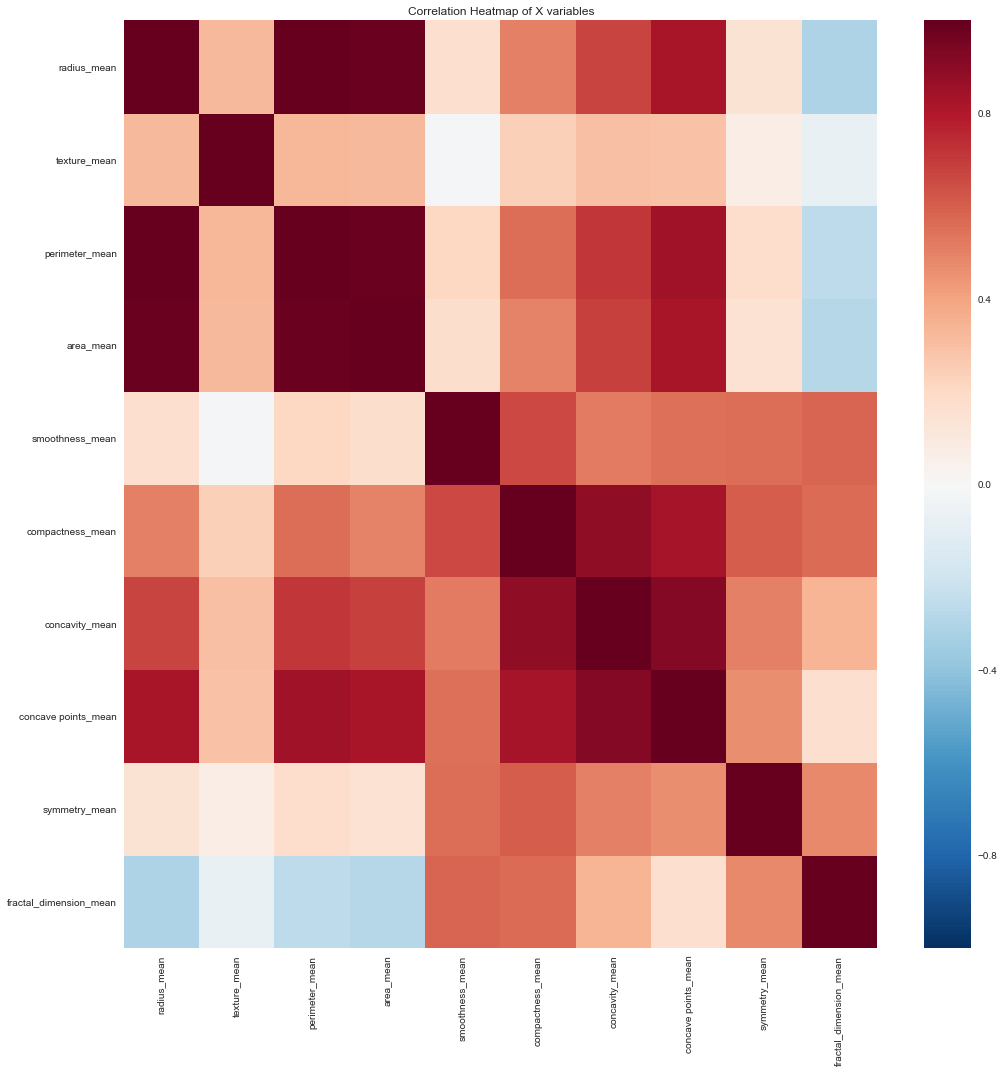

In [11]:
# Check correlation among X variables
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax = sns.heatmap(X.corr(), annot=False, fmt='.1f')
ax.set_title("Correlation Heatmap of X variables")
plt.tight_layout()
plt.show(fig)

In [13]:
from sklearn.model_selection import train_test_split
# Split dataset into train (90%) & test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=19810521)


In [14]:
from sklearn.preprocessing import StandardScaler
# Standardize train set columnwise, to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# numpy의 array 리턴값을 pandas dataframe으로 변형
X_train = pd.DataFrame(X_train, columns=X.columns)

In [16]:
# Standardize test data columnwise, by using mean and variance obtained from train set 
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [18]:
from sklearn.linear_model import LogisticRegression
# Instantiate a Logistic Regression classifier (using scikit-learn)
clf_lg = LogisticRegression()
# Fit on training set
clf_lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# Predict labels of train & test sets
y_train_pred = clf_lg.predict(X_train)
y_test_pred = clf_lg.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, f1_score
# Show train & test accuracies
print('- Accuracy (Train) : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (Test)  : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & test f1 scores
print('- F1 score (Train) : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label='M')))
print('- F1 score (Test)  : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label='M')))

- Accuracy (Train) : 0.9453
- Accuracy (Test)  : 0.9123
- F1 score (Train) : 0.9247
- F1 score (Test)  : 0.878


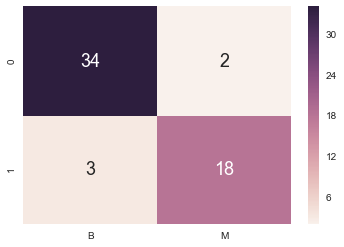

In [21]:
from sklearn.metrics import confusion_matrix
# Plot a confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
cm_test = pd.DataFrame(cm_test, columns=['B', 'M'])
sns.heatmap(data=cm_test, annot=True, annot_kws={'size': 18})